In [4]:
import os
import random

import numpy as np
from PIL import Image
import cv2

from keyrover import YOLO_DATASET

from ultralytics import YOLO

[ 3280  4500  4544  5070  5120  5312  5913  5950  6030  6097  6370  7470  9790 11300 12441 12969 19388 29946]


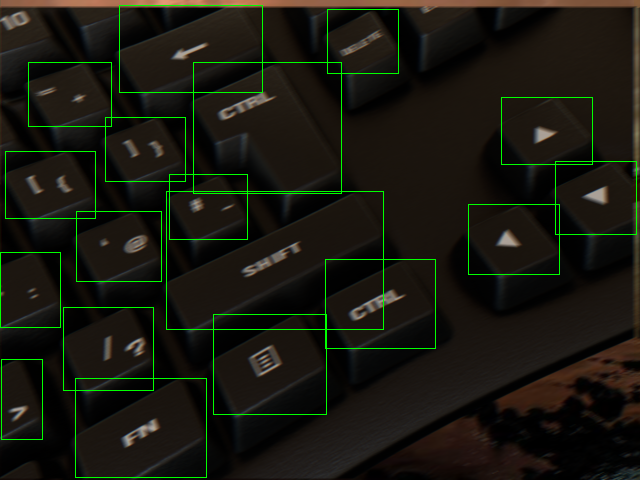

In [20]:
paths = os.listdir(f"{YOLO_DATASET}/train/labels")
i = random.choice(paths)

img = Image.open(f"{YOLO_DATASET}/train/images/{i.removesuffix('.txt')}.png")
img = np.array(img)

with open(f"{YOLO_DATASET}/train/labels/{i}") as file:
    lines = file.readlines()

areas = []

for line in lines:
    _, cx, cy, w, h = map(float, line.split())
    cx *= img.shape[1]
    cy *= img.shape[0]
    w = int(w * img.shape[1])
    h = int(h * img.shape[0])

    x1 = int(cx - w / 2)
    y1 = int(cy - h / 2)

    areas.append(w * h)
    cv2.rectangle(img, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 1)

areas = np.array(list(sorted(areas)))
print(areas)

def reject_outliers(data, m=-0.5):
    d = data - np.median(data)
    mdev = np.median(data)
    s = d / mdev if mdev else np.zeros(len(d))
    return data[s > m]


# print(reject_outliers(areas))
Image.fromarray(img)

In [39]:
model = YOLO("yolo11n.pt")
results = model.train(data=f"{YOLO_DATASET}/data.yaml", time=1, patience=10, batch=32, single_cls=True, imgsz=320,
                      cache=True, verbose=True, device="mps", plots=True, project="models/yolo")

New https://pypi.org/project/ultralytics/8.3.26 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.25 🚀 Python-3.11.1 torch-2.5.0 MPS (Apple M1 Max)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=datasets/yolo/data.yaml, epochs=100, time=1, patience=10, batch=32, imgsz=320, save=True, save_period=-1, cache=True, device=mps, workers=8, project=models/yolo, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=F

train: Scanning /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo/train/labels.cache... 1828 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1828/1828 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.4GB RAM): 100%|██████████| 1828/1828 [00:01<00:00, 1018.14it/s]
val: Scanning /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo/valid/labels.cache... 174 images, 0 backgrounds, 0 corrupt: 100%|██████████| 174/174 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 174/174 [00:00<00:00, 989.43it/s]


Plotting labels to models/yolo/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to models/yolo/train4
Starting training for 1 hours...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       8.1G       1.75      2.406      1.084        268        320: 100%|██████████| 58/58 [09:49<00:00, 10.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:14<00:28, 14.26s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:26<00:12, 12.84s/it]

WARNING ⚠️ NMS time limit 4.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:37<00:00, 12.39s/it]


                   all        174       8729      0.162     0.0446      0.111     0.0686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/6      10.4G       1.37     0.7671     0.9127        357        320: 100%|██████████| 58/58 [09:24<00:00,  9.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:18<00:37, 18.52s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:31<00:15, 15.52s/it]

WARNING ⚠️ NMS time limit 4.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:43<00:00, 14.57s/it]


                   all        174       8729      0.755     0.0448      0.124     0.0744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/6      11.5G      1.264     0.6423     0.9046        249        320: 100%|██████████| 58/58 [10:01<00:00, 10.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:12<00:25, 12.92s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:22<00:10, 10.78s/it]

WARNING ⚠️ NMS time limit 4.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:34<00:00, 11.64s/it]


                   all        174       8729      0.816     0.0349      0.118     0.0831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/6      10.5G      1.209     0.6049      0.897        232        320: 100%|██████████| 58/58 [11:56<00:00, 12.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:23<00:47, 23.85s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:40<00:19, 19.40s/it]

WARNING ⚠️ NMS time limit 4.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:58<00:00, 19.36s/it]


                   all        174       8729       0.76     0.0353      0.119     0.0901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/6      9.46G      1.165      0.582     0.8896        315        320: 100%|██████████| 58/58 [12:21<00:00, 12.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:29<00:59, 29.55s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:51<00:25, 25.19s/it]

WARNING ⚠️ NMS time limit 4.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:06<00:00, 22.12s/it]


                   all        174       8729      0.765     0.0354      0.127     0.0879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/6      7.35G      1.131     0.5801     0.8881       2358        320:  10%|█         | 6/58 [01:56<16:45, 19.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:26<00:52, 26.49s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:48<00:23, 23.75s/it]

WARNING ⚠️ NMS time limit 4.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:07<00:00, 22.51s/it]


                   all        174       8729      0.816     0.0243      0.104     0.0668

6 epochs completed in 1.028 hours.
Optimizer stripped from models/yolo/train4/weights/last.pt, 5.4MB
Optimizer stripped from models/yolo/train4/weights/best.pt, 5.4MB

Validating models/yolo/train4/weights/best.pt...
Ultralytics 8.3.25 🚀 Python-3.11.1 torch-2.5.0 MPS (Apple M1 Max)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [01:00<02:00, 60.08s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [01:41<00:49, 49.25s/it]

WARNING ⚠️ NMS time limit 4.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [02:24<00:00, 48.17s/it]


                   all        174       8729      0.735     0.0601      0.147     0.0942
Speed: 0.6ms preprocess, 160.1ms inference, 0.0ms loss, 141.5ms postprocess per image
Results saved to models/yolo/train4



0: 480x640 (no detections), 45.1ms
Speed: 0.8ms preprocess, 45.1ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)


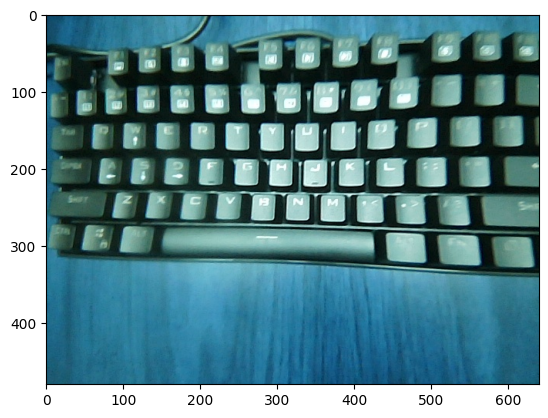

In [38]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt

img = Image.open("datasets/test/2.jpg")
# img = img.resize((320, 320))
results = model(img)[0]
img = results.orig_img.copy()

for box in results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    color = (255, 0, 0)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness=2)

plt.imshow(img)
plt.show()